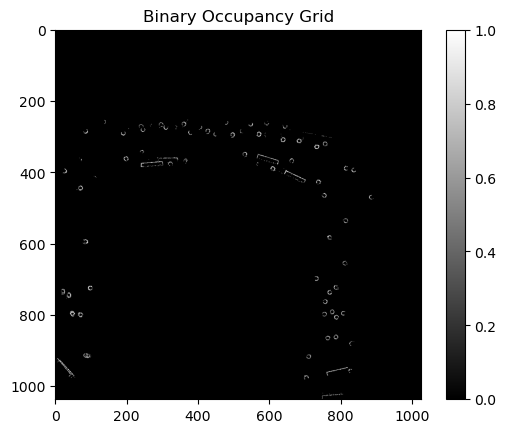

(1037, 1027) [0 1]


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Load the binary occupancy grid from the provided .npy file
file_path = r'C:\Users\boddu\Downloads\binary_occupancy_grid.npy'
occupancy_grid = np.load(file_path)

# Display the occupancy grid
plt.imshow(occupancy_grid, cmap='gray')
plt.title('Binary Occupancy Grid')
plt.colorbar()
plt.show()

# Print some basic information about the grid
print(occupancy_grid.shape, np.unique(occupancy_grid))

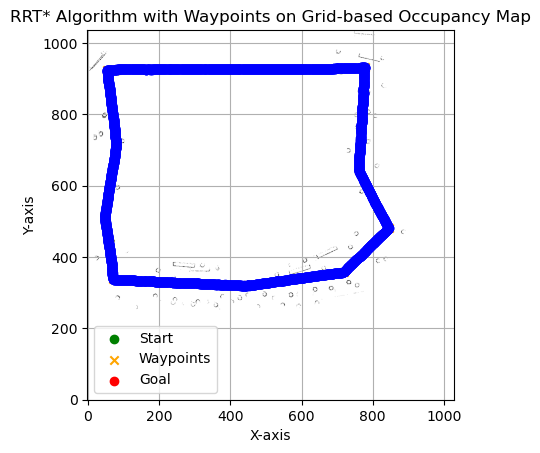

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Node class definition
class Node:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.parent = None
        self.cost = 0.0

def node_2_node_distance(node1, node2):
    # Compute the Euclidean distance between two nodes
    return np.sqrt((node1.x - node2.x) ** 2 + (node1.y - node2.y) ** 2)

def check_collision_free(new_node, occupancy_grid):
    # Convert node coordinates to grid indices
    x_idx = int(new_node.x)
    y_idx = int(new_node.y)
    
    # Check if the node is within grid bounds and not colliding with obstacles
    if x_idx < 0 or x_idx >= occupancy_grid.shape[1] or y_idx < 0 or y_idx >= occupancy_grid.shape[0]:
        return False  # Out of grid bounds
    
    if occupancy_grid[y_idx, x_idx] == 1:  # Assuming 1 represents obstacles
        return False  # Collision
    
    return True  # No collision

def move_node_2_node(from_node, to_node, max_distance):
    distance = node_2_node_distance(from_node, to_node)
    if distance < max_distance:
        return Node(to_node.x, to_node.y)
    else:
        x_new = from_node.x + max_distance * (to_node.x - from_node.x) / distance
        y_new = from_node.y + max_distance * (to_node.y - from_node.y) / distance
        return Node(x_new, y_new)

def rewire_tree(tree, new_node, max_distance):
    for node in tree:
        if node != new_node.parent and node_2_node_distance(new_node, node) < max_distance:
            if new_node.parent is None or node_2_node_distance(new_node, node) + node.cost < new_node.cost:
                new_node.parent = node
                new_node.cost = node.cost + node_2_node_distance(new_node, node)
                while node.parent:
                    node.cost = node.parent.cost + node_2_node_distance(node, node.parent)
                    node = node.parent

def is_within_bounds(node, x_range, y_range):
    return node.x >= min(x_range) and node.x <= max(x_range) and node.y >= min(y_range) and node.y <= max(y_range)

def rrt_star(start, goal, x_range, y_range, occupancy_grid, waypoints, max_distance=1):
    path = [start]
    newn = start
    for goal_node in waypoints:
        goal = Node(goal_node[0], goal_node[1])
        while node_2_node_distance(newn, goal) > max_distance:
            direx = (goal.x - newn.x) / node_2_node_distance(newn, goal)
            direy = (goal.y - newn.y) / node_2_node_distance(newn, goal)
            x_adj = random.uniform(direx - 0.2, direx + 0.2) * max_distance
            y_adj = random.uniform(direy - 0.2, direy + 0.2) * max_distance
            randomn = Node(newn.x + x_adj, newn.y + y_adj)
            
            if not is_within_bounds(randomn, x_range, y_range):
                continue
            
            newn = move_node_2_node(newn, randomn, max_distance)
            if check_collision_free(newn, occupancy_grid):
                rewire_tree(path, newn, max_distance)
                path.append(newn)
        
        # Add the goal node to the path
        path.append(goal)
    
    return path

# Example occupancy grid (replace with your specific occupancy grid data)
occupancy_grid = np.load(r'C:\Users\boddu\Downloads\binary_occupancy_grid.npy')
# Define start and goal nodes
start_node = Node(450, 320)  # Example start node
waypoints = [ 
    (450, 320), 
    (70, 337), 
    (48, 514), 
    (80, 715), 
    (55, 925),
    (777, 932), 
    (760, 643), 
    (845, 480), 
    (718, 357), 
    (450, 320)]  # Example waypoints

# Define the range of the occupancy grid (replace with actual grid dimensions)
x_range = (0, occupancy_grid.shape[1] - 1)
y_range = (0, occupancy_grid.shape[0] - 1)

# Run RRT* algorithm
path = rrt_star(start_node, goal_node, x_range, y_range, occupancy_grid, waypoints)

# Plotting results
plt.imshow(occupancy_grid, cmap='Greys', origin='lower')
plt.plot([node.x for node in path], [node.y for node in path], marker='o', color='b')
plt.scatter(start_node.x, start_node.y, color='green', marker='o', label='Start')
plt.scatter([waypoint[0] for waypoint in waypoints], [waypoint[1] for waypoint in waypoints], color='orange', marker='x', label='Waypoints')
plt.scatter(path[-1].x, path[-1].y, color='red', marker='o', label='Goal')
plt.legend()
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('RRT* Algorithm with Waypoints on Grid-based Occupancy Map')
plt.grid(True)
plt.show()


In [12]:
def save_path_to_file(path, filename):
    with open(filename, 'w') as f:
        f.write("X,Y\n")  # Header line
        for node in path:
            f.write(f"{node.x},{node.y}\n")

# Example usage
path = rrt_star(start_node, goal_node, x_range, y_range, occupancy_grid, waypoints)
output_file = r"C:\Users\boddu\Downloads\path_coordinates.csv"  # Specify the full path and desired filename

save_path_to_file(path, output_file)
print(f"Path coordinates saved to {output_file}")


Path coordinates saved to C:\Users\boddu\Downloads\path_coordinates.csv
